In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
#checking for null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2200 

column Name :  HUMIDITY
No. of unique values : 2200 

column Name :  PH
No. of unique values : 2200 

column Name :  RAINFALL
No. of unique values : 2200 

column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


There are 22 classes in output variable

In [6]:
#EDA
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Variable Name : N


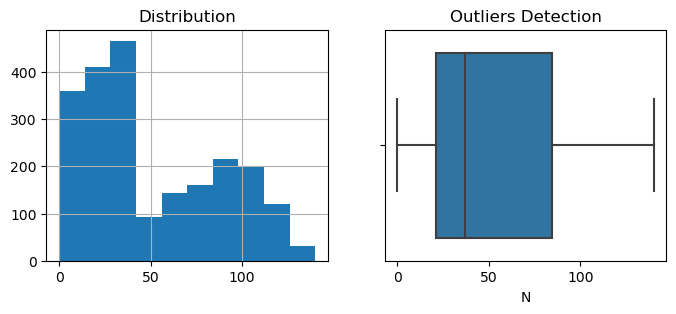

Variable Name : P


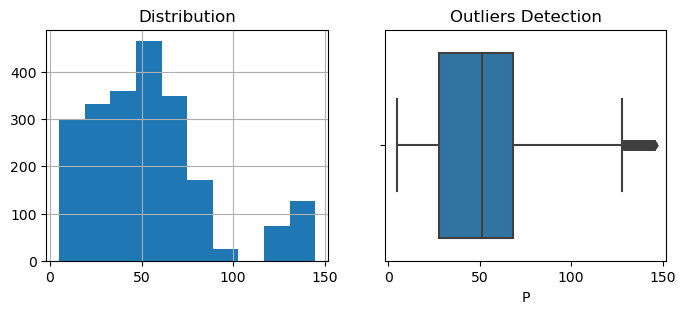

Variable Name : K


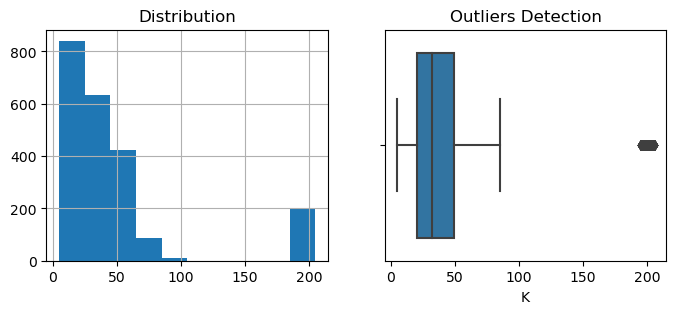

Variable Name : TEMPERATURE


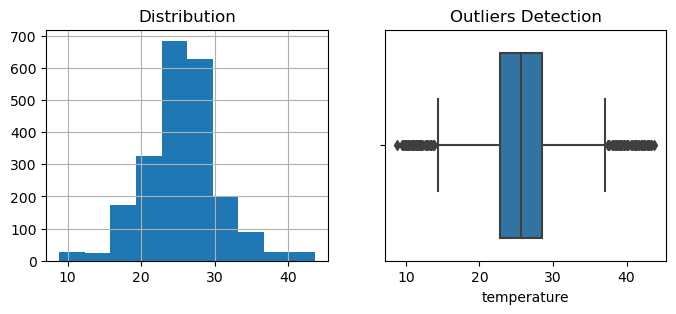

Variable Name : HUMIDITY


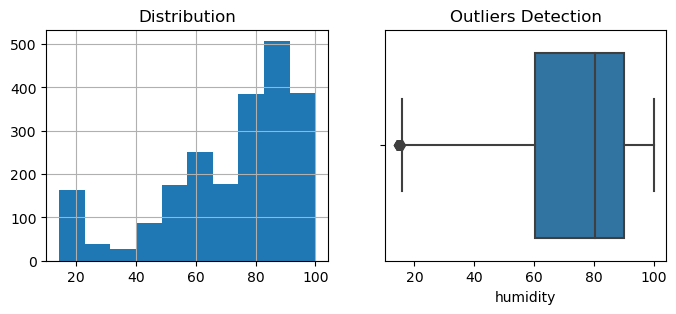

Variable Name : PH


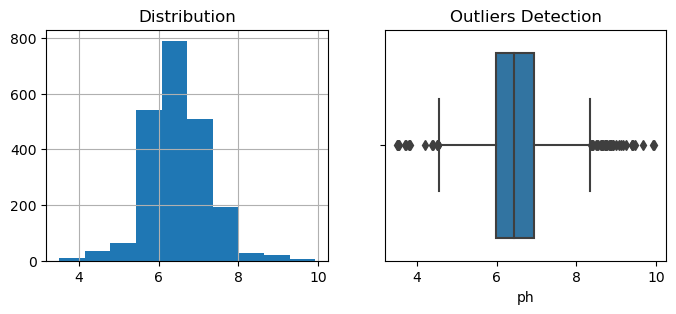

In [7]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,3))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()

Variable : N


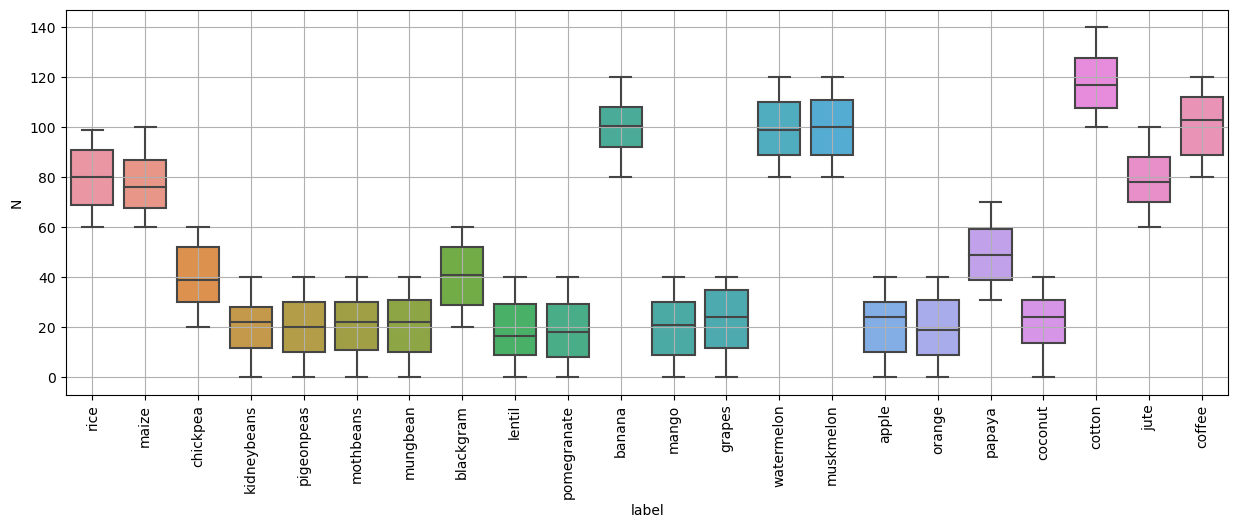

Variable : P


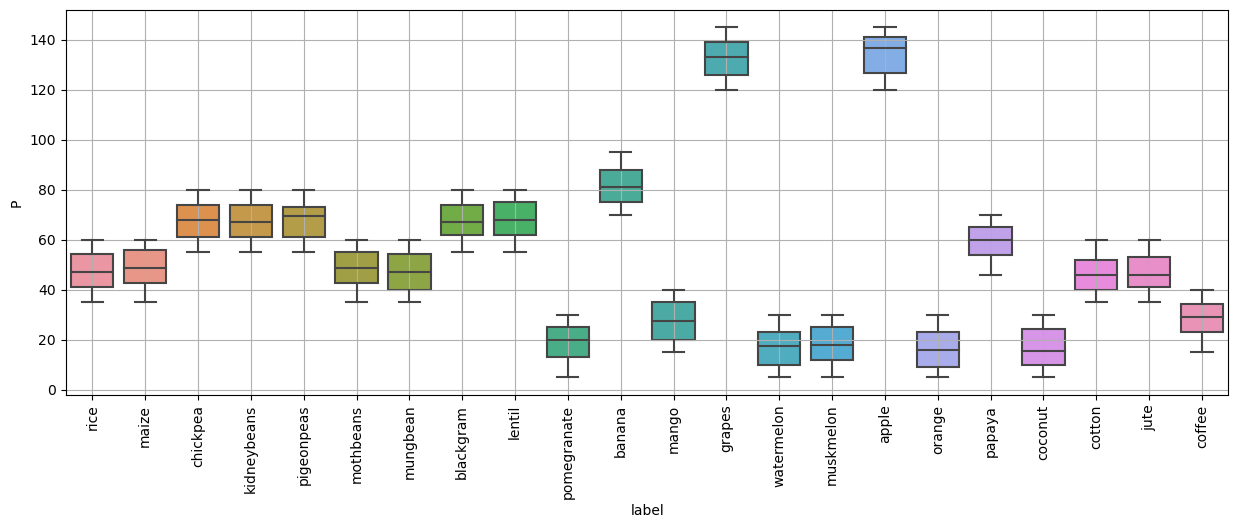

Variable : K


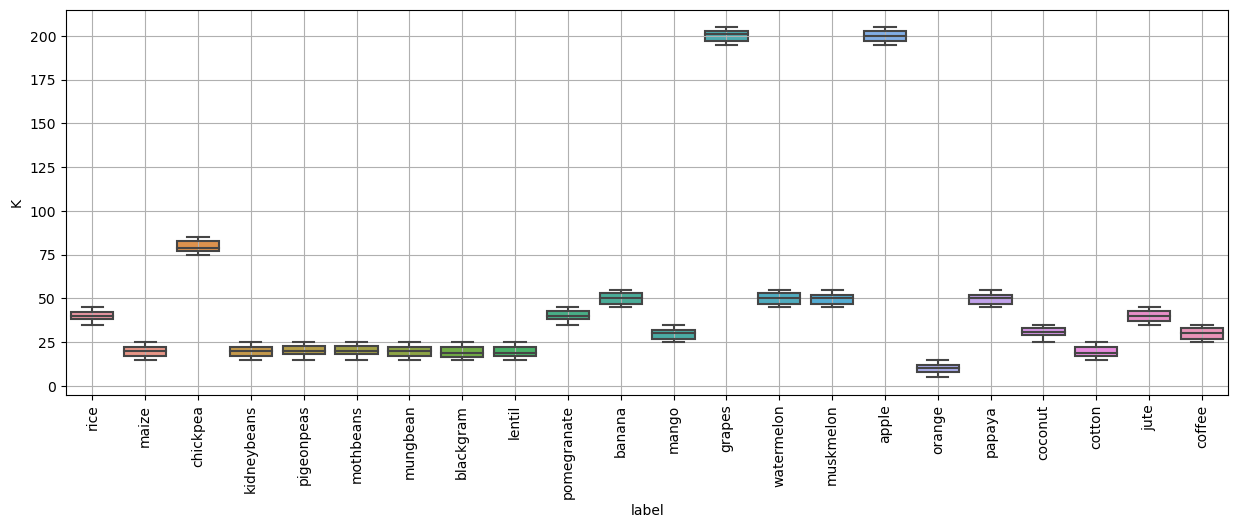

Variable : TEMPERATURE


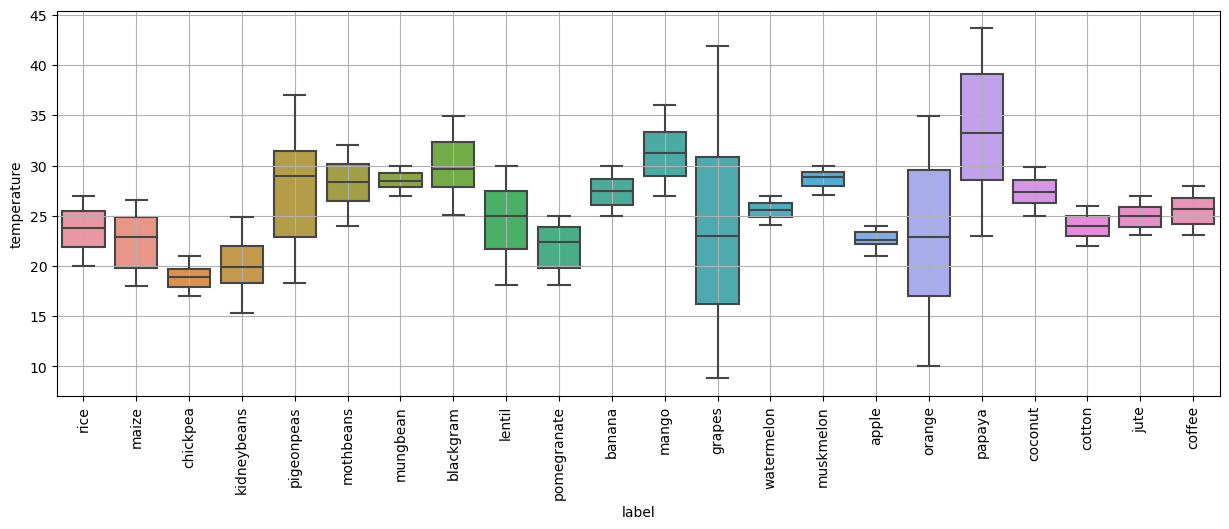

Variable : HUMIDITY


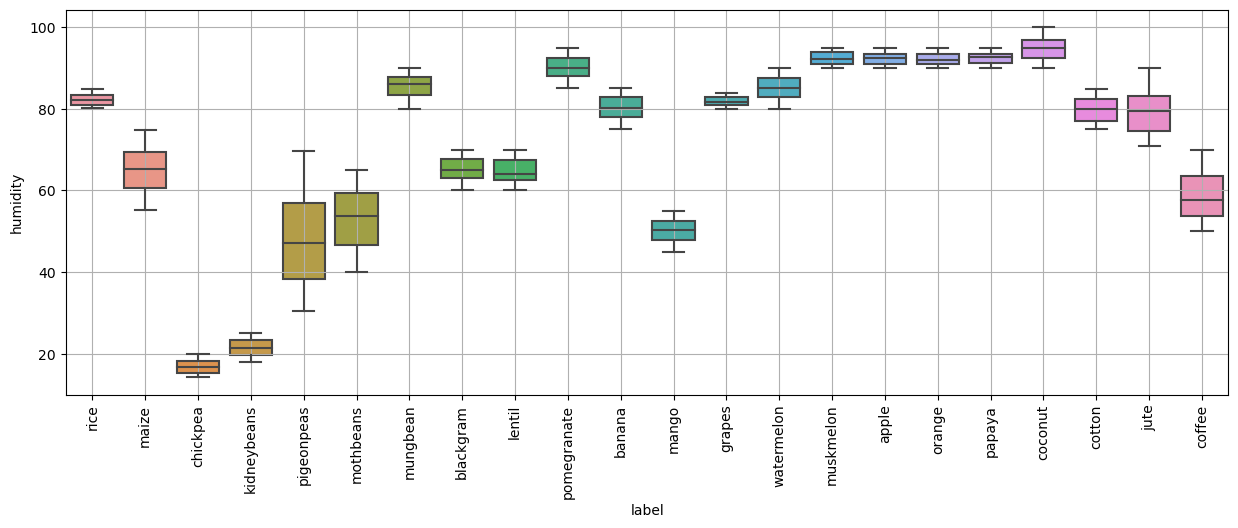

Variable : PH


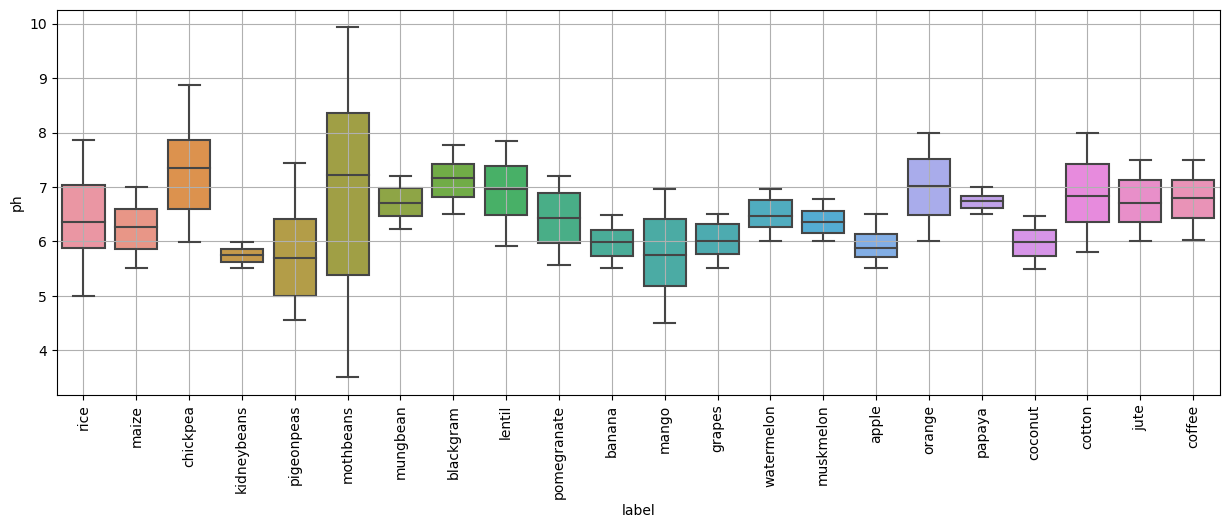

In [8]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(15,5))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

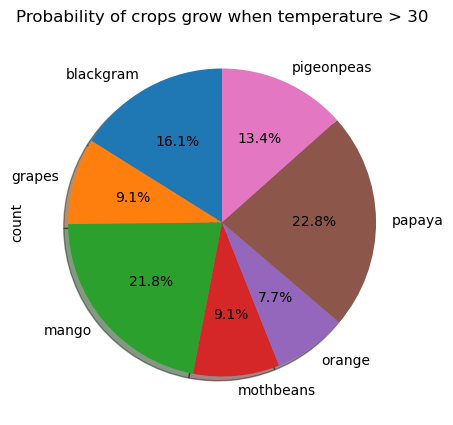

In [9]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(5,5),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

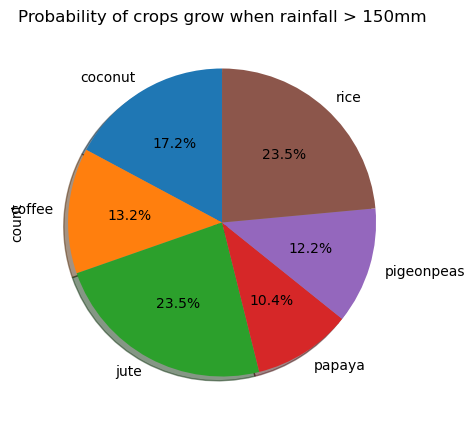

In [10]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(5,5),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

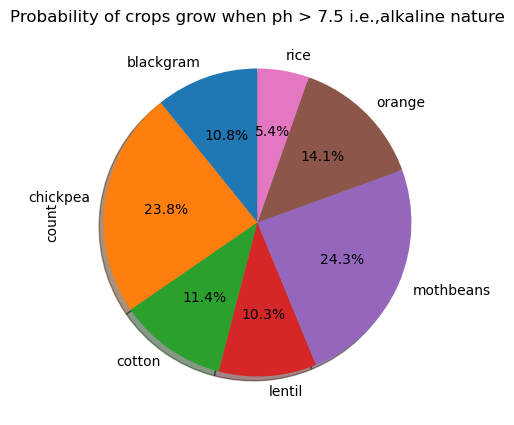

In [11]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(5,5),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

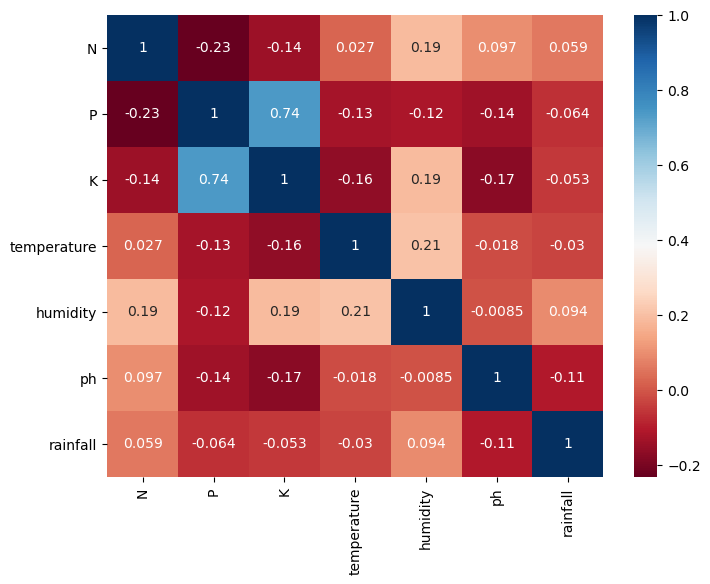

In [12]:
# checking the co-relation between variables
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True,cmap = 'RdBu')
plt.show()

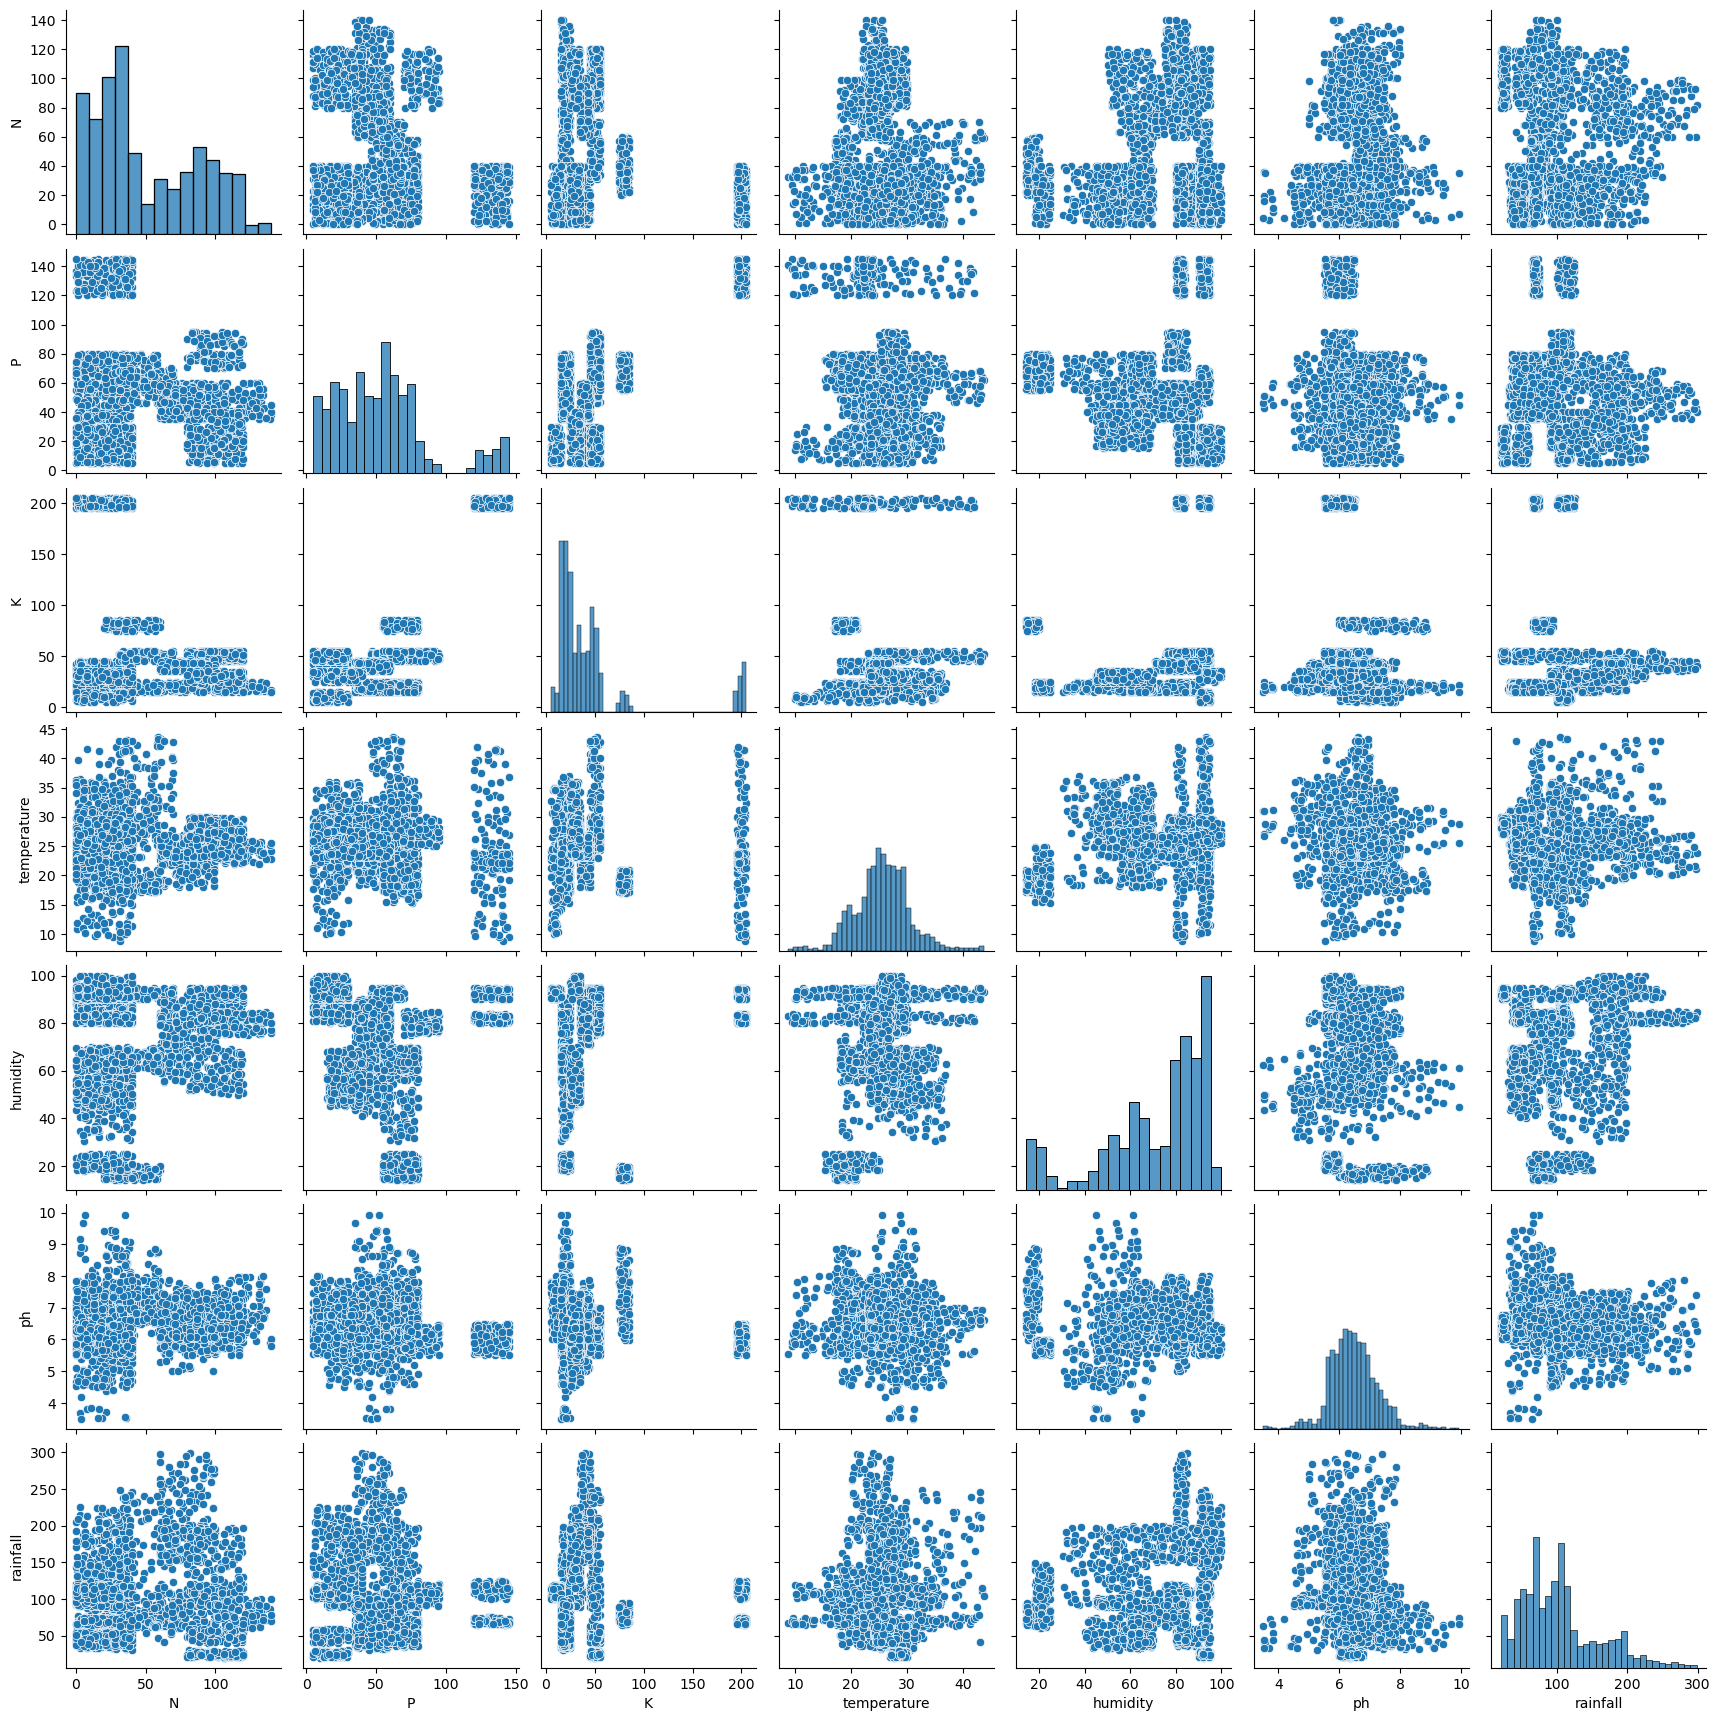

In [13]:
# pair plot
sns.pairplot(data)
plt.show()

In [14]:
# Encoding the output variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# fitting it to output variable and updating the dataset
data['encoded_label'] = encoder.fit_transform(data.label)

In [15]:
# creating dataframe which represents the encoded classes
pd.DataFrame(zip(encoder.classes_,encoder.transform(encoder.classes_)),columns=['Original','Encoded']).set_index('Original')

,Encoded
Original,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [16]:
# splitting the data into input and output
x = data.drop('label',axis=1)
y = data.encoded_label

In [17]:
# apply standard scalar to remove scaling effect
from sklearn.preprocessing import StandardScaler

# initializing the scalar
scalar = StandardScaler()

# scaling the input data
X = scalar.fit_transform(x)

In [24]:
# splitting the data into 80% train and 20% test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print('Shape of Splitted data')
print(f'x_train = {x_train.shape}, y_train = {y_train.shape}, x_test = {x_test.shape}, y_test = {y_test.shape}')

Shape of Splitted data
x_train = (1760, 8), y_train = (1760,), x_test = (440, 8), y_test = (440,)


### Building Logistic regression model

In [19]:
# importing the neessary libraries
from sklearn.linear_model import LogisticRegression

# Initializing the model
logis = LogisticRegression()

In [20]:
logis.fit(X,y)

LogisticRegression()

In [21]:
logis.predict([X[0]])

array([20])